#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
# Inspeccionar df para ver la estructura y procesos necesarios
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [3]:
# Normalizar las columnas con diccionarios y unirlas al dataframe original
df_clientes = pd.json_normalize(df['customer'])
df_internet = pd.json_normalize(df['internet'])
df_phone = pd.json_normalize(df['phone'])
df_cuenta = pd.json_normalize(df['account'])

df = pd.concat(
    [df[['customerID', 'Churn']], df_clientes, df_phone, df_internet, df_cuenta],
    axis=1
).copy()
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
# 1. Información general
print("🔍 Información general del DataFrame:")
print(df.info())

# 2. Conteo de valores nulos por columna
print("\n🧯 Valores nulos por columna:")
print(df.isnull().sum())

# 3. Columnas categóricas: valores únicos
cols_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

print("\n🧾 Valores únicos por columna categórica:")
for col in cols_categoricas:
    print(f"{col}: {df[col].unique()}")

# 4. Revisión de variables numéricas (estadísticas básicas)
cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\n📊 Estadísticas descriptivas de columnas numéricas:")
print(df[cols_numericas].describe())

# 5. ¿Hay IDs duplicados?
print("\n🔁 Duplicados en customerID:")
print(df['customerID'].duplicated().sum())

df.to_csv("telecom.csv")

🔍 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contr

In [5]:
# Reemplazar strings vacíos con NaN en la columna 'Churn' y contar
df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'].isnull().sum()

np.int64(224)

In [6]:
# Borrar lineas con churn nulo y convertimos a binario el resto de datos de la columna
df = df.dropna(subset=['Churn']).copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

In [7]:
# Convertir a numérico, forzando errores a NaN
(df['Charges.Total'] == ' ').sum()
df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df = df.dropna(subset=['Charges.Total']).copy()

In [8]:
# Convetir coloumas con solo 2 valores únicos (sin contar nulos) en 1 y 0 ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
binarias = [col for col in df.columns
            if df[col].nunique(dropna=True) == 2 and df[col].dtype == 'object']

df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0, 'Male': 'Hombre', 'Female': 'Mujer'})

/tmp/ipython-input-8-1267332386.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0, 'Male': 'Hombre', 'Female': 'Mujer'})


In [9]:
#Renombrar columnas al español y adicionar columna cuentas_diarias
df.rename(columns={
    'customerID': 'IDCliente',
    'Churn': 'Cancelado',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'tenure': 'TiempoContrato',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'PhoneService': 'Telefono',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'Internet',
    'OnlineSecurity': 'Seguridad',
    'OnlineBackup': 'Respaldo',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'Soporte',
    'StreamingTV': 'TV',
    'StreamingMovies': 'Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'}, inplace=True)

df['CuentasDiarias'] = (df['CargoMensual'] / 30).round(2)

# Cambiar datos columnas de servicios opcionales a binarios
servicios_opcionales = ['MultiplesLineas', 'Seguridad',
    'Respaldo', 'ProteccionDispositivo', 'Soporte','TV', 'Peliculas']
pd.set_option('future.no_silent_downcasting', True)
# Reemplazar valores textuales por binarios
for col in servicios_opcionales:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}).astype(int)

In [10]:
df

,IDCliente,Cancelado,Genero,AdultoMayor,Pareja,Dependientes,TiempoContrato,Telefono,MultiplesLineas,Internet,...,ProteccionDispositivo,Soporte,TV,Peliculas,Contrato,FacturaElectronica,MetodoPago,CargoMensual,CargoTotal,CuentasDiarias
0,0002-ORFBO,0,Mujer,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,0,Hombre,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,1,Hombre,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Hombre,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Mujer,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Mujer,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,1,Hombre,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,0,Hombre,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Hombre,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [11]:
# Análisis descriptivo de los datos del df
df.describe()

,Cancelado,AdultoMayor,Pareja,Dependientes,TiempoContrato,Telefono,MultiplesLineas,Seguridad,Respaldo,ProteccionDispositivo,Soporte,TV,Peliculas,FacturaElectronica,CargoMensual,CuentasDiarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2.159891
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,1.002955
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,1.187500
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,2.992500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.960000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IDCliente              7032 non-null   object 
 1   Cancelado              7032 non-null   int64  
 2   Genero                 7032 non-null   object 
 3   AdultoMayor            7032 non-null   int64  
 4   Pareja                 7032 non-null   int64  
 5   Dependientes           7032 non-null   int64  
 6   TiempoContrato         7032 non-null   int64  
 7   Telefono               7032 non-null   int64  
 8   MultiplesLineas        7032 non-null   int64  
 9   Internet               7032 non-null   object 
 10  Seguridad              7032 non-null   int64  
 11  Respaldo               7032 non-null   int64  
 12  ProteccionDispositivo  7032 non-null   int64  
 13  Soporte                7032 non-null   int64  
 14  TV                     7032 non-null   int64  
 15  Peliculas

#📊 Carga y análisis

In [13]:
# Definir colores a trabajar
azul_1 = '#3d4dbd'
azul_2 = '#0f1377'
azul_3 = '#0b0f44'
azul_4 = '#9dbbfa'
Gris_1 = '#f2f2f2'
Aqua_1 = '#75ccb6'
azul_5 = '#678af5'



### Tasa de Cancelación general

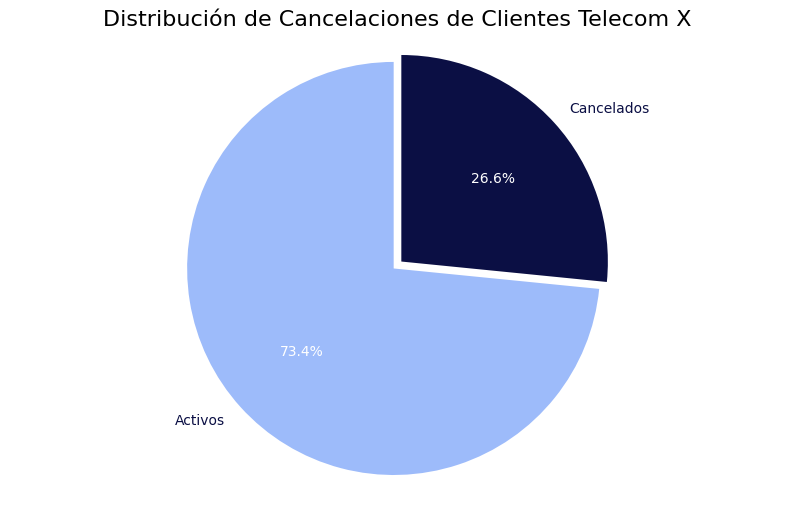

In [25]:
# Función para crear la visualización general de las cancelaciones
def visualizar_cancelaciones(archivo):
  # Conteo de clientes por estado de cancelación
  cancelaciones = df['Cancelado'].value_counts()
  etiquetas = ['Activos', 'Cancelados']
  colores = [azul_4, azul_3]

  # Crear el gráfico circular
  #plt.figure(figsize=(10, 6))
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.set_facecolor(Gris_1)
  wedges, texts, autotexts = plt.pie(
      cancelaciones,
      labels=etiquetas,
      autopct='%1.1f%%',
      startangle=90,
      colors=colores,
      explode=(0, 0.05)
  )
  # Cambiar el color de los labels (etiquetas de categorías)
  for text in texts:
      text.set_color(azul_3)

  # Cambiar el color de los autopct (porcentajes dentro del gráfico)
  for autotext in autotexts:
      autotext.set_color('white')
  plt.title('Distribución de Cancelaciones de Clientes Telecom X', fontsize = 16)
  plt.axis('equal')  # Asegura que el círculo sea redondo
  fig.savefig(archivo, bbox_inches='tight', facecolor=Gris_1)
  return plt

visualizar_cancelaciones('cancelaciones.png').show()

In [15]:
demograficos = ['Genero', 'AdultoMayor', 'Pareja', 'Dependientes']
servicios = ['Telefono', 'Internet']
cont_fact_mp = ['Contrato', 'FacturaElectronica', 'MetodoPago']

In [16]:
# Función para calcular los porcentajes de cancelación de clientes por variable categórica
def analizar_cancelacion_servicio(df, columna_servicio):

    # Agrupamos por la columna de servicio y contamos la distribución de cancelación/permanencia.
    columna_cancelacion='Cancelado'
    calcula_porcentajes = df.groupby(columna_servicio)[columna_cancelacion].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(2)

    # Renombramos las columnas para mayor claridad en el resultado.
    calcula_porcentajes.columns = ['% Activos', '% Cancelados']

    #Analizar valores únicos para renombrar columna de indice si es binario
    unique_values = calcula_porcentajes.index.unique().tolist()

    if sorted(unique_values) == [0, 1]:
        mapeo_binario = {0: 'No', 1: 'Sí'}
        calcula_porcentajes = calcula_porcentajes.rename(index=mapeo_binario)

    print(f"\n### Análisis de '{columna_servicio}' y 'Cancelación'")
    print(calcula_porcentajes)

    return calcula_porcentajes


# --- Lista de variables categóricas a Analizar ---
servicios_a_analizar = ['Genero','AdultoMayor', 'Pareja', 'Dependientes','Telefono',
    'Internet',  'Contrato',  'FacturaElectronica', 'MetodoPago']

# --- Ciclo For para el Análisis ---
print("---")
print("## Resumen de Tasas de Cancelación y Permanencia por Variable")

# Iterar sobre la lista de servicios
for servicio in servicios_a_analizar:
    analizar_cancelacion_servicio(df, servicio)

print("Análisis automatizado completado.")
print("---")

---
## Resumen de Tasas de Cancelación y Permanencia por Variable

### Análisis de 'Genero' y 'Cancelación'
        % Activos  % Cancelados
Genero                         
Hombre      73.80         26.20
Mujer       73.04         26.96

### Análisis de 'AdultoMayor' y 'Cancelación'
             % Activos  % Cancelados
AdultoMayor                         
No               76.35         23.65
Sí               58.32         41.68

### Análisis de 'Pareja' y 'Cancelación'
        % Activos  % Cancelados
Pareja                         
No          67.02         32.98
Sí          80.28         19.72

### Análisis de 'Dependientes' y 'Cancelación'
              % Activos  % Cancelados
Dependientes                         
No                68.72         31.28
Sí                84.47         15.53

### Análisis de 'Telefono' y 'Cancelación'
          % Activos  % Cancelados
Telefono                         
No            75.00         25.00
Sí            73.25         26.75

### Análisis de 'I

In [26]:
def visualizar_cancelacion_categoricas(df, lista_columnas_servicio, tipo_variable, n_cols, archivo):

    mapeo_estado = {0: 'Activo', 1: 'Cancelado'}
    colores_estado = {'Activo': azul_4, 'Cancelado': azul_3}
    n_rows = (len(lista_columnas_servicio) + n_cols - 1) // n_cols
    columna_cancelacion='Cancelado'

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5.5, n_rows * 4.5), facecolor=Gris_1)
    axes = axes.flatten()
    fig.suptitle(f"Estado de Clientes de Telecom X por {tipo_variable}", fontsize=18, color=azul_3, y=1.02)

    for i, col in enumerate(lista_columnas_servicio):
        if i >= len(axes): break
        ax = axes[i]
        ax.set_facecolor(Gris_1)

        # Agrupación y transformación
        df_plot = (df.groupby(col)[columna_cancelacion].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(1))

        # Filtrar y renombrar columnas
        df_plot = df_plot[[c for c in [0, 1] if c in df_plot.columns]]
        df_plot.columns = [mapeo_estado[c] for c in df_plot.columns]

        # Colores según columnas presentes
        colores = [colores_estado[c] for c in df_plot.columns]
        df_plot.plot(kind='bar', color=colores, ax=ax)

        # Etiquetas de datos
        for container in ax.containers:
            labels = [f'{h.get_height():.1f}%' if h.get_height() > 0 else '' for h in container]
            ax.bar_label(container, labels=labels, label_type='edge',
                         color=azul_3, fontsize=8, padding=2)

        # Estética
        ax.set_title(f'Cancelación por {col}', fontsize=12, color=azul_3, pad=20)
        ax.set_xlabel('')
        ax.set_ylabel('% de Clientes', fontsize=10)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='y', labelsize=9)

        # Etiquetas del eje X
        if sorted(df[col].dropna().unique().tolist()) == [0, 1]:
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['No', 'Sí'], fontsize=8)

        # Rotación condicional
        xticks = ax.get_xticklabels()
        rotar = len(xticks) > 3 or (xticks and len(xticks[0].get_text()) > 10)
        plt.setp(xticks, rotation=45 if rotar else 0, ha='right' if rotar else 'center')

        # Leyenda
        if ax.get_legend():
            ax.legend(title='Estado', loc='best', bbox_to_anchor=(1.0, 1.0), fontsize = 8, title_fontsize=10)

        # Quitar bordes
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

    # Ocultar subplots vacíos
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(h_pad=3.0, w_pad=4, rect=[0, 0.03, 1, 0.95])
    fig.savefig(archivo, bbox_inches='tight', facecolor=Gris_1)
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

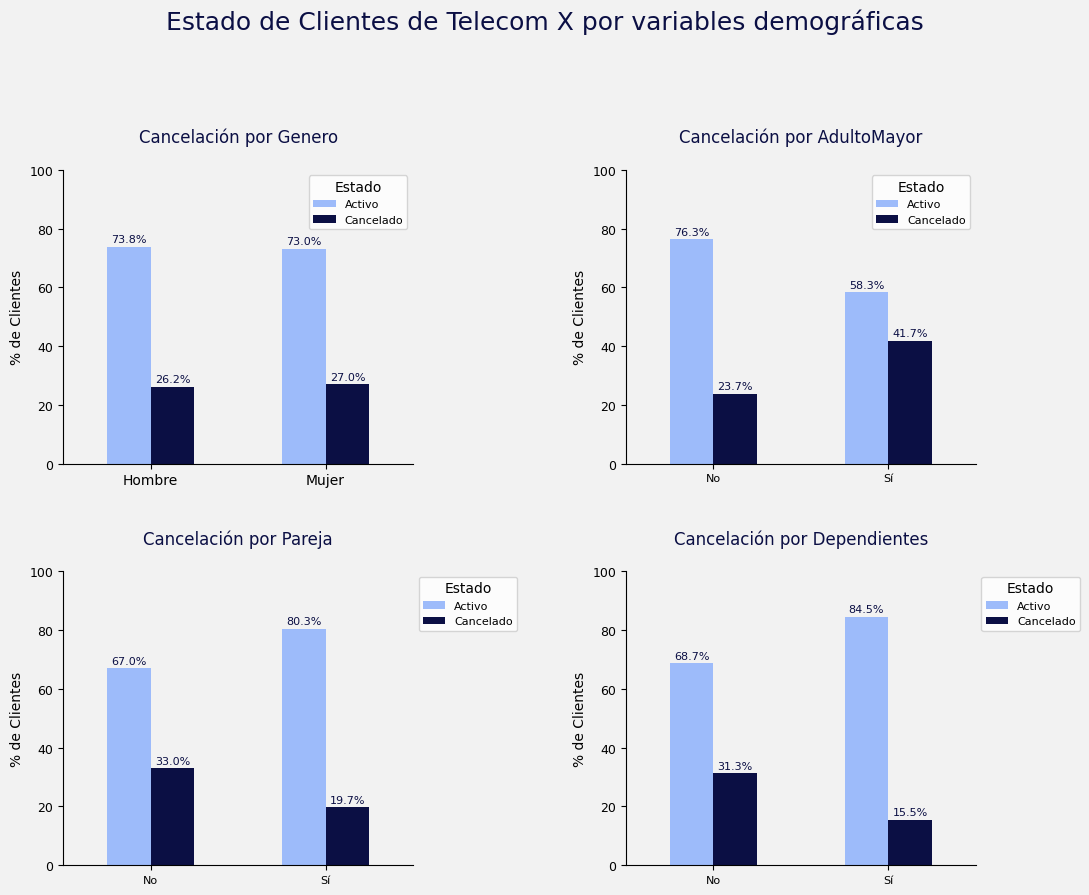

In [27]:
visualizar_cancelacion_categoricas(df, demograficos, 'variables demográficas', 2, 'demograficos.png')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

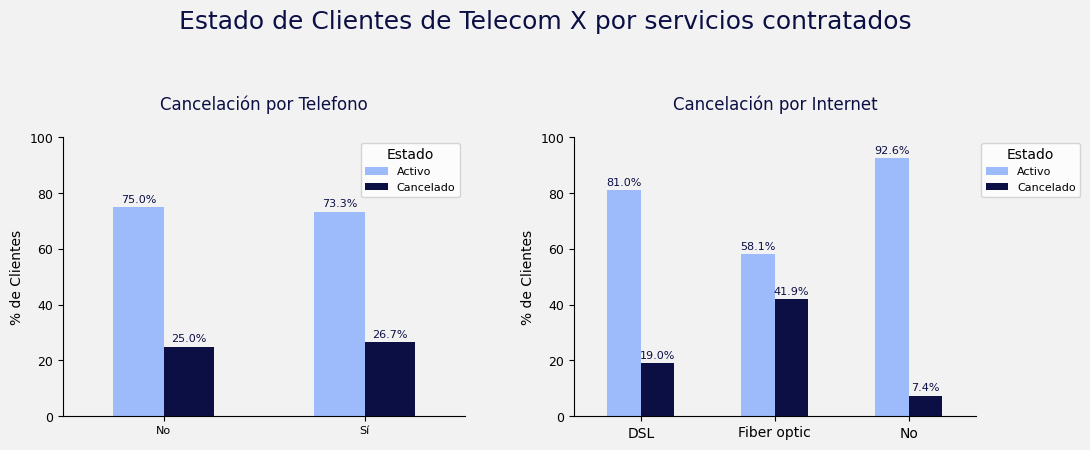

In [28]:
visualizar_cancelacion_categoricas(df, servicios, 'servicios contratados', 2, 'servicios.png')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

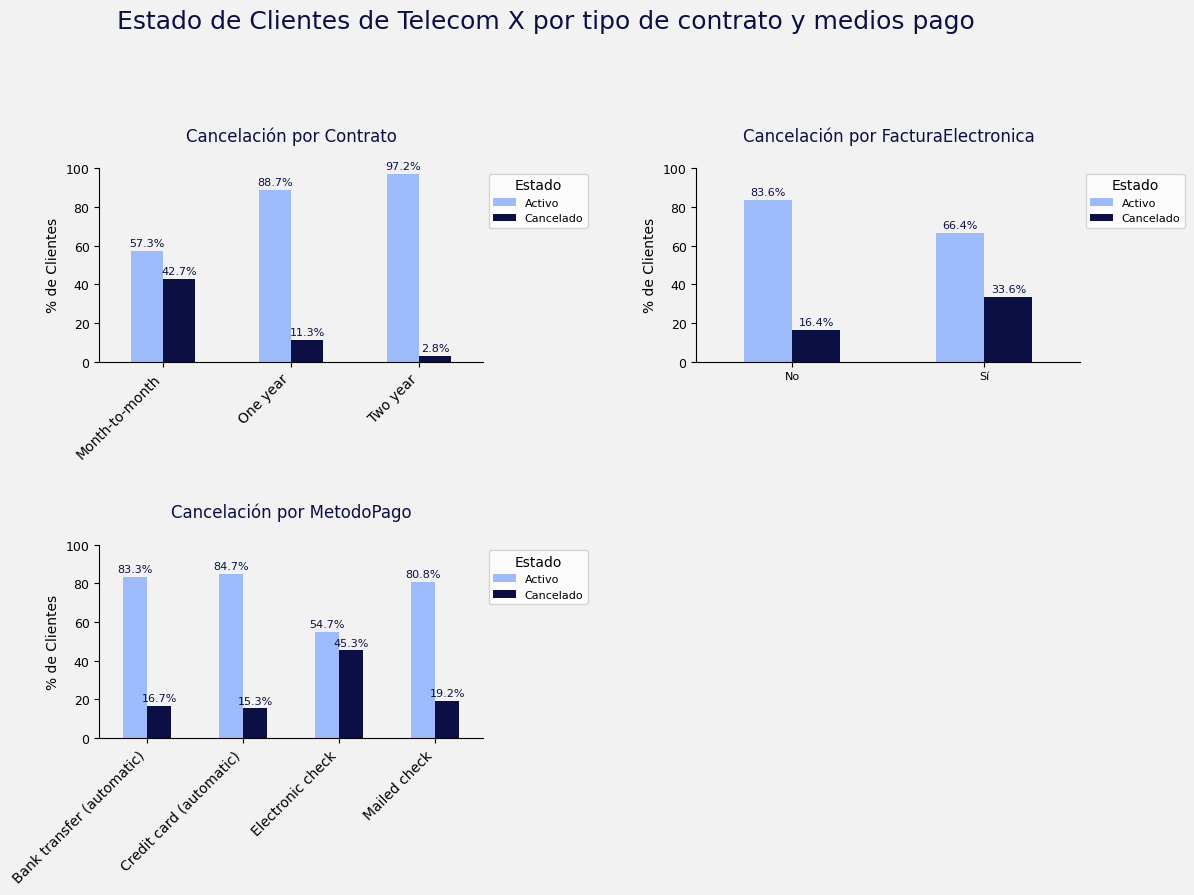

In [29]:
visualizar_cancelacion_categoricas(df, cont_fact_mp, 'tipo de contrato y medios pago', 2, 'cont_fact_pago.png')

### Visualizaciones por variables numéricas

In [30]:
def visualizar_numerica_matrix(df, columna_numerica, etiqueta, archivo):

    mapeo_estado_churn = {0: 'Activos', 1: 'Cancelados'}
    columna_cancelacion='Cancelado'

    # --- Configuración de la Matriz de Subplots (1 fila, 2 columnas) ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor=Gris_1) # Ajustamos un poco el figsize
    fig.suptitle(f'Análisis de cancelación de clientes de Telecom X por {etiqueta}', fontsize=18, color=azul_3, y=1.05)

    # --- GRÁFICO 1: Gráfico de Densidad (KDE Plot) ---
    ax1 = axes[0]
    ax1.set_facecolor(Gris_1)

    sns.kdeplot(data=df, x=columna_numerica, hue=columna_cancelacion,
                fill=True, common_norm=False, # Muestra solo la línea sin relleno, y normaliza cada curva por separado
                palette={0: azul_1, 1: azul_2},
                hue_order=[0, 1],
                ax=ax1)

    ax1.set_title(f'Densidad de clientes', fontsize=14, color=azul_3, pad=15)
    ax1.set_ylabel('')
    ax1.set_yticks([])
    ax1.set_xlabel(etiqueta, fontsize=11)

    # Personalizar la leyenda del KDE plot
    legend1 = ax1.get_legend()
    if legend1:
        for text, original_label in zip(legend1.get_texts(), ['0', '1']):
            text.set_text(mapeo_estado_churn[int(original_label)])
        legend1.set_title('Estado')
        legend1.get_frame().set_facecolor(Gris_1)

    # Quitar bordes y ticks Y para el KDE plot (similar a tu estilo)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_color('black')
    ax1.spines['bottom'].set_color('black')


    # --- GRÁFICO 2: Boxplot de la Variable Numérica vs. Cancelación ---
    ax2 = axes[1]
    ax2.set_facecolor(Gris_1)

    # Asegurarse de que la columna de cancelación es categórica para el boxplot
    df_temp = df.copy()
    df_temp[columna_cancelacion + '_cat'] = df_temp[columna_cancelacion].astype(str)

    sns.boxplot(data=df_temp,
                x=columna_cancelacion + '_cat',
                y=columna_numerica,
                hue=columna_cancelacion + '_cat',
                palette={'0': azul_1, '1': azul_2},
                legend=False,
                ax=ax2)

    ax2.set_xticks([0, 1])
    ax2.set_xticklabels([mapeo_estado_churn[0], mapeo_estado_churn[1]])

    ax2.set_title(f'Distribución de clientes', fontsize=14, color=azul_3, pad=15)
    ax2.set_xlabel('Estado del Cliente', fontsize=11)
    ax2.set_ylabel(etiqueta, fontsize=11)

    # Quitar bordes para el boxplot
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_color('black')
    ax2.spines['bottom'].set_color('black')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

    # Espacio entre los subplots
    plt.tight_layout(w_pad=5.0, rect=[0, 0.03, 1, 0.98])


    fig.savefig(archivo, bbox_inches='tight', facecolor=Gris_1)
    print(f"Gráfico guardado como '{archivo}'")

    return plt


Gráfico guardado como 'dbpcargomensual.png'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

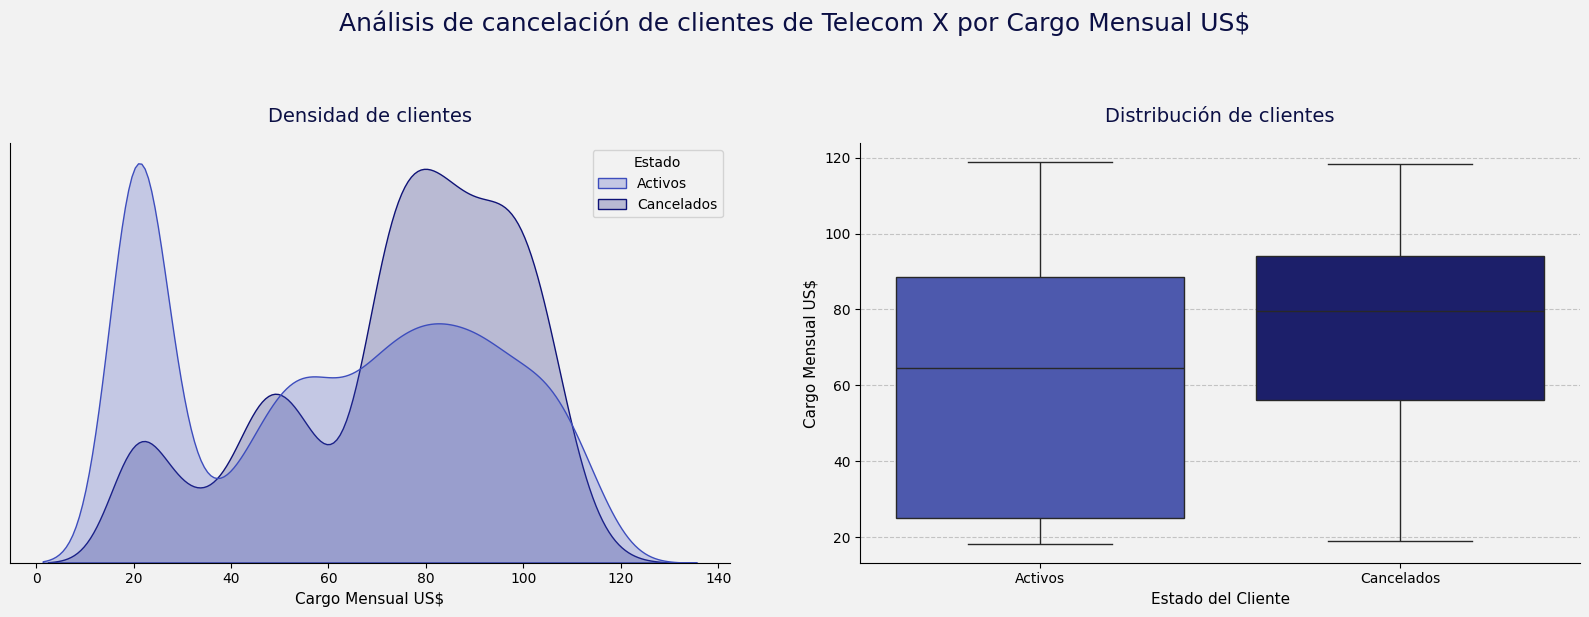

In [31]:
visualizar_numerica_matrix(df, 'CargoMensual', 'Cargo Mensual US$', 'dbpcargomensual.png')

Gráfico guardado como 'dbpcuentasdiarias.png'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

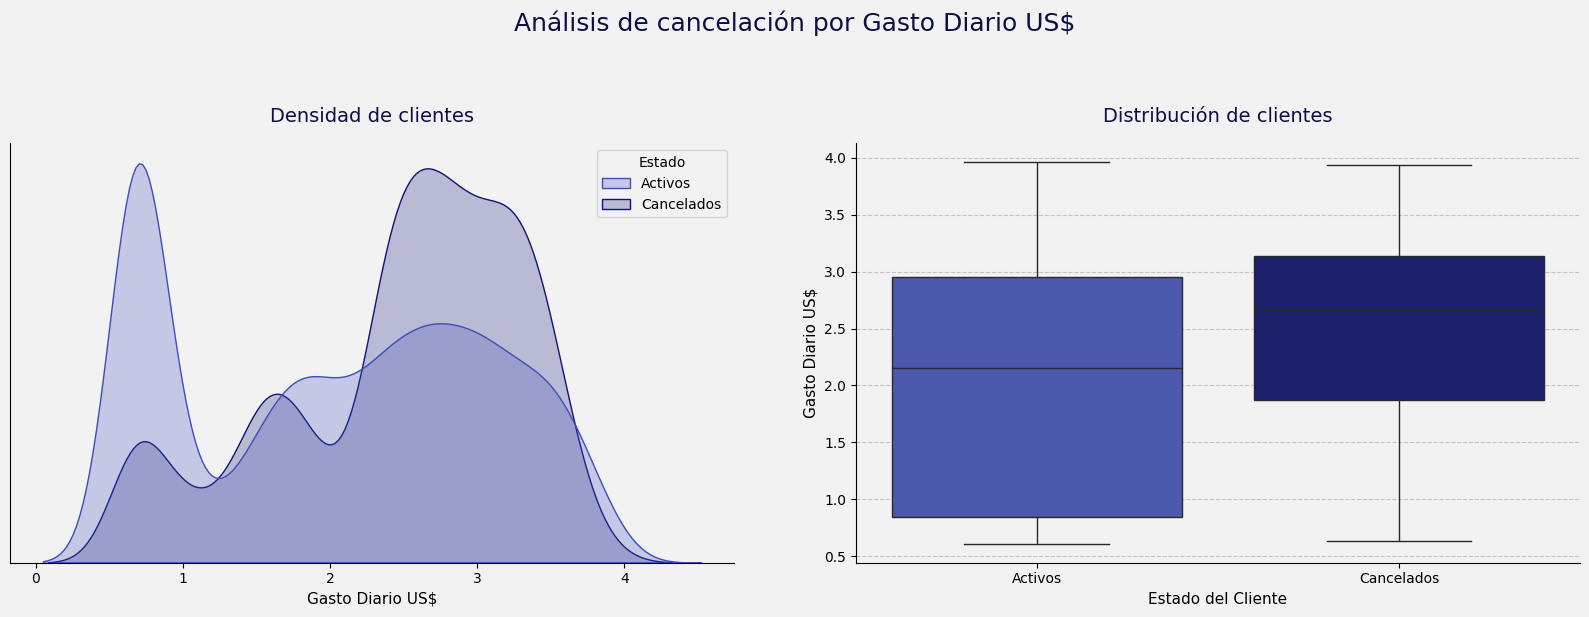

In [23]:
visualizar_numerica_matrix(df, 'CuentasDiarias', 'Gasto Diario US$', 'dbpcuentasdiarias.png')

Gráfico guardado como 'dbpcontrato.png'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

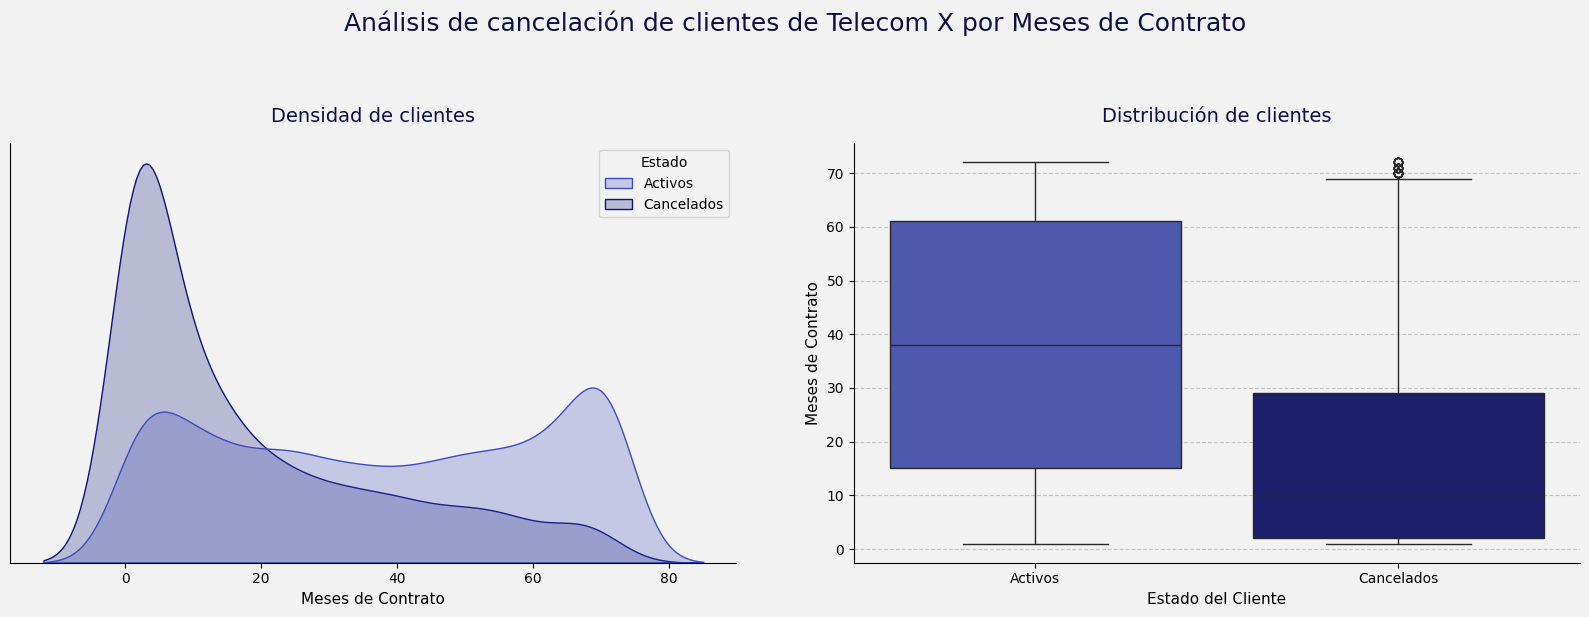

In [33]:
visualizar_numerica_matrix(df, 'TiempoContrato', 'Meses de Contrato', 'dbpcontrato.png')

#📄Informe final

#📄 Informe de Análisis de Cancelación de Clientes – Telecom X

## 1. 🎯 Objetivo

Identificar los factores clave que influyen en la cancelación (churn) de clientes de Telecom X y proporcionar información relevante para el diseño de estrategias focalizadas en su retención y fidelización.

## 2. 🔍 Metodología

Los datos fueron obtenidos desde una API en formato JSON, y estructurados en un DataFrame de Pandas de Telecom X que incluyen información demográfica, servicios contratados, detalles de facturación y el estado final del contrato (activo o cancelado).
Los pasos metodológicos incluyeron:

- **Carga de Datos:** Los datos se cargaron directamente desde una URL utilizando la librería pandas. Se aplicó un proceso de normalización de datos anidados, se renombraron columnas y se realizó el tratamiento y limpieza de datos.
Análisis Descriptivo General: Se calculó la tasa de cancelación global para establecer una línea base.
- **Análisis de Variables Categóricas:** Se exploró la relación entre las características categóricas de los clientes (ej. edad, estado civil, tipo de contrato, servicios de internet y teléfono, método de pago, facturación electrónica) con las cancelaciones, utilizando visualizaciones de gráficos de barras para comparar las proporciones de cancelación.
- **Análisis de Variables Numéricas:** Se examinó la distribución de variables numéricas clave como el cargo mensual, las cuentas diarias y el tiempo de contrato para clientes activos y cancelados usando gráficos de densidad para mostrar las curvas de distribución y gráficos de caja (boxplots) para visualizar la dispersión y los estadísticos descriptivos.
- **Visualización:** Se utilizaron las librerías matplotlib.pyplot y seaborn para generar todas las visualizaciones, que fueron guardadas en formato de imagen para su inclusión en este informe.
- **Conclusiones y recomendaciones:** Se extrajeron conclusiones a través de los patrones observados en los datos y visualizaciones generadas.

## 3. 📊 Resultados y Análisis

####- **Tasa de Cancelación General:**

El 26.6% de los clientes de Telecom X cancelan su contrato, porcentaje que supera la cuarta parte de la base de clientes por lo cual es imperativo implementar estrategias de retención efectivas para reducir la tendencia esta tendencia.

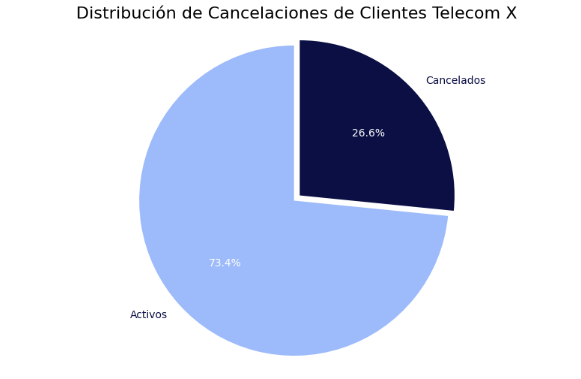

####- **Demografía y Familia:**


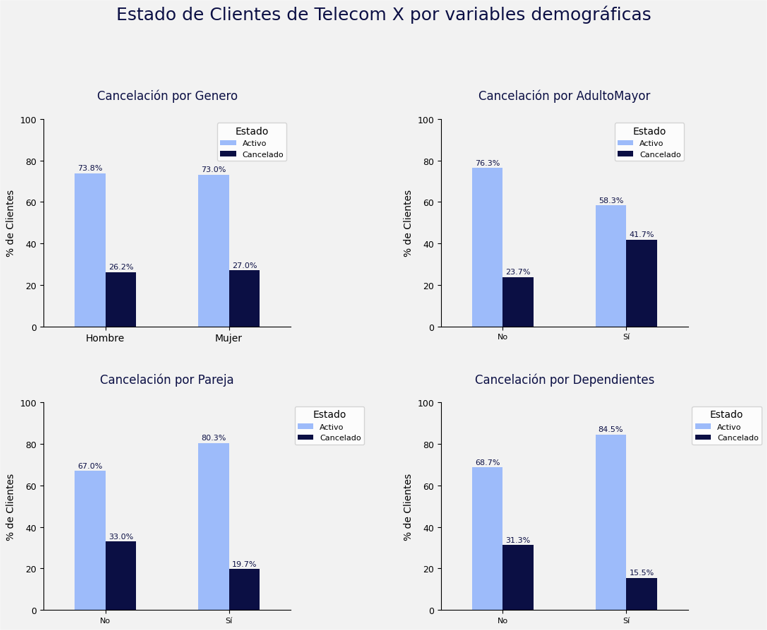

Los adultos mayores y los clientes sin vínculos familiares o sentimentales muestran una tendencia significativamente mayor a cancelar. Esto podría deberse a una menor necesidad de conectividad, menor afinidad digital, poca adaptación a la tecnología o sensibilidad al costo.

####- **Servicios Contratados:**

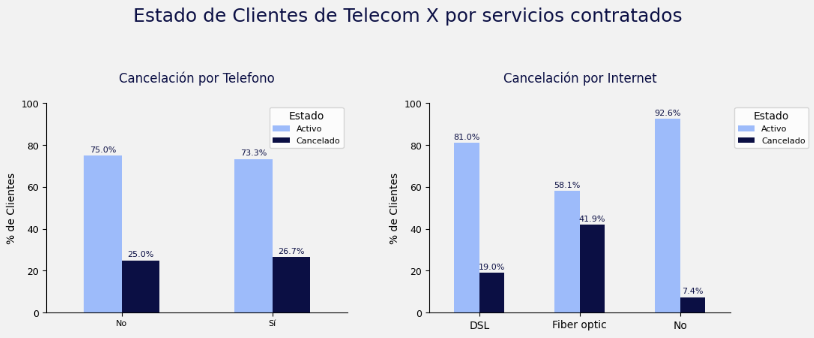

La tecnología más avanzada (fibra óptica) no garantiza mayor retención. Esto podría deberse a tarifas más elevadas, problemas de instalación, servicio postventa deficiente, problemas de rendimiento o insatisfacción general no relacionada con la velocidad.


####- **Contrato y Facturación:**
Los contratos sin compromiso a largo plazo tienden a atraer a clientes más volátiles. Además, los clientes con facturación electrónica, que suelen ser más autónomos, también presentan mayor rotación.

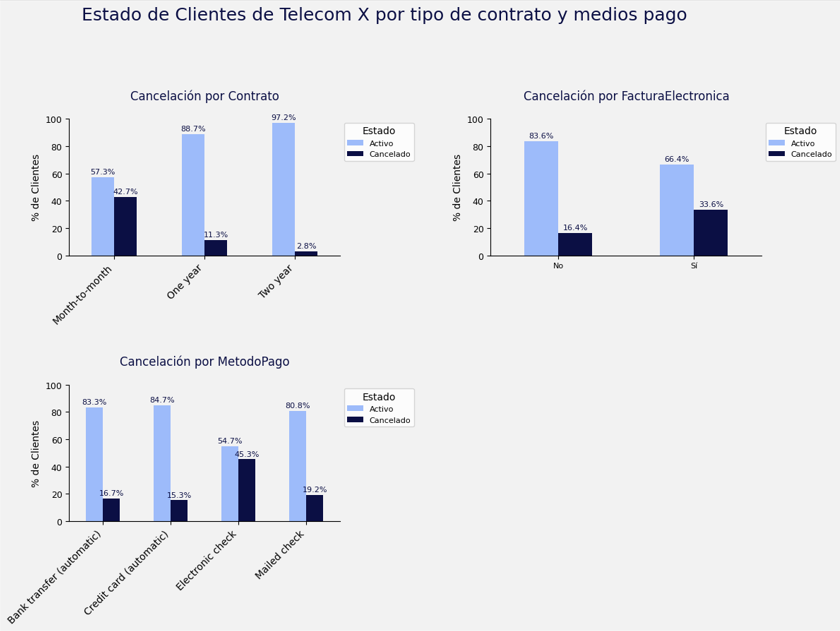



Los clientes que usan como método de pago los cheques electrónicos tienden a cancelar más que quienes usan otros métodos de pago, lo que sugiere clientes con menor bancarización o menor estabilidad financiera.

####- **Cargos y Antigüedad:**




Los clientes con los cargos mensuales y cuentas diarias más altas son más propensos a cancelar probablemente por percepción de alto costo frente al valor recibido.

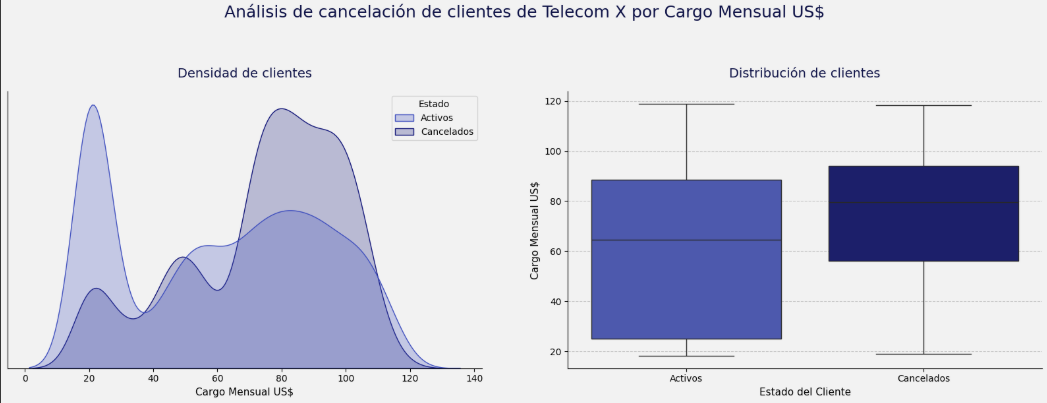




Los clientes con menos de 24 meses de antigüedad en el contrato cancelan con mayor frecuencia lo que podría indicar falta o deficiencia en los programas de bienvenida y fidelización iniciales para establecer una lealtad duradera.

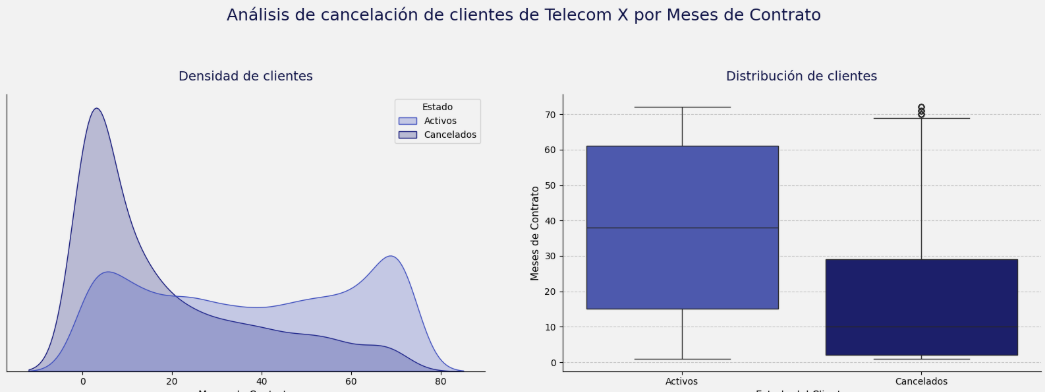

## 4. ✅ Conclusiones y Recomendaciones

###**Conclusiones:**

- La cancelación de servicios afecta a más de una cuarta parte de la base de clientes.
- La cancelación se concentra en segmentos demográficos específicos (adultos mayores, solteros, sin dependientes).
- Ciertos servicios y tipos de contrato (fibra óptica, mes a mes) son puntos críticos de fuga.
- El método de pago (cheque electrónico) es un indicador de mayor riesgo de cancelación.
- Los clientes de alto valor y baja antigüedad son particularmente vulnerables a cancelaciones.

###**Recomendaciones:**

- **Desarrollo de Programas de Retención Segmentados:**
  - Crear ofertas personalizadas, soporte técnico adaptado y comunicaciones dirigidas a adultos mayores, enfocándose en la simplicidad y el valor del servicio.
  - Implementar incentivos para la migración de contratos mes a mes a planes de mayor duración como descuentos por permanencia o beneficios exclusivos.

- **Optimización de la Experiencia con Fibra Óptica:**

  - Realizar una auditoría exhaustiva de la calidad del servicio de fibra óptica, incluyendo velocidad, estabilidad y el proceso de atención al cliente.
  - Considerar ajustes en la estructura de precios

- **Programas de fidelización:**

  - Establecer programas de bienvenida robustos para nuevos clientes, con seguimiento proactivo en los primeros 24 meses.

- **Transición de  Métodos de Pago:**

  - Promover el uso de métodos digitales más estables (tarjeta, débito automático) con incentivos y facilidad de registro.




